**import necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import re
from transformers import pipeline

**pipeline for sentiment analysis model initialization**

In [ ]:

pipe_sent = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


**function for sentiment score predictions**

In [ ]:

def Sent_analysis(text):

        sent = pipe_sent(text)[0]

        return pd.Series([sent['label'], sent['score']])


**load dataset**

In [ ]:
# Replace with your dataset
Dataset = pd.read_csv("/content/Comments.csv")

**drop nan**

In [ ]:
Dataset = Dataset.dropna()

**transfrom data**

In [ ]:
Dataset = Dataset.drop(columns=["Unnamed: 0"],axis=1)

In [ ]:
Dataset['label'] = None
Dataset['score'] = None

**apply sentiment analysis function**

In [ ]:
Dataset[['label', 'score']] = Dataset['comments'].apply(Sent_analysis)


In [ ]:
# print dataset

Dataset

comments     label     score
0    Unsteady Biden, a Subdued Trump: The Debate An...   neutral  0.816595
2    The bravest thing wsj has ever done is leave t...  positive  0.766752
4                  10 pushups minimum to be in office.   neutral  0.773266
6              Who else went straight to the comments?   neutral  0.886720
8    Honestly, i think i agree with Biden when he s...  positive  0.511710
..                                                 ...       ...       ...
710  How many times can Joe possibly say “The idea”...   neutral  0.605136
712  in the beginning biden looks like he was about...  negative  0.476471
714  Everytime Trump talks, Biden looks at him like...   neutral  0.604309
716  I literally had to turn on the subtitles becau...  negative  0.896517
718  You just know all the standup comedians are wa...   neutral  0.618075

[360 rows x 3 columns]

**Visualize the all comments using wordcloud to know most common word**

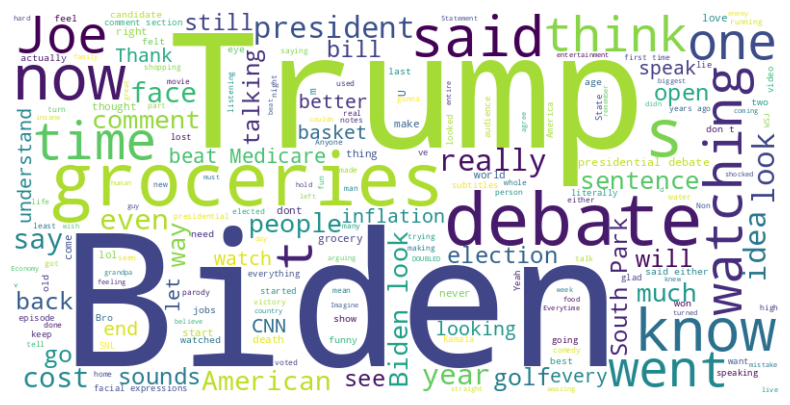

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Input text

text = " ".join(Dataset["comments"].to_list())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


**Note:- keyword/entity Should to be comma seprated in User_ent eg. manish,suresh,verma,mishra,rahul etc.**

In [1]:
# Replace with your entity

ent_names = "joe,biden,joe biden,donald,trump,donald,trump"

**function to extract entities/keywrords from text**

In [ ]:
import re

def Extract_entities(text):


  User_input = ent_names.lower().split(",")

  pattern = r'\b(?:' + '|'.join(User_input) + r')\b'

  matches = re.findall(pattern, text.lower())

  return " ".join( matches)

**Add new column and apply Extract_entities function**

In [ ]:
Dataset['ner'] = None
Dataset['ner'] = Dataset['comments'].map(Extract_entities)

**sort entities in alphabetical order**

In [ ]:
def sort_entities(ent):

  ent = ent.split()

  ent = sorted(ent)

  return " ".join(ent)

**apply function**

In [ ]:
Dataset['ner'] = Dataset['ner'].map(sort_entities)

In [ ]:
Dataset

comments     label     score  \
0    Unsteady Biden, a Subdued Trump: The Debate An...   neutral  0.816594   
2    The bravest thing wsj has ever done is leave t...  positive  0.766752   
4                  10 pushups minimum to be in office.   neutral  0.773266   
6              Who else went straight to the comments?   neutral  0.886720   
8    Honestly, i think i agree with Biden when he s...  positive  0.511710   
..                                                 ...       ...       ...   
710  How many times can Joe possibly say “The idea”...   neutral  0.605137   
712  in the beginning biden looks like he was about...  negative  0.476472   
714  Everytime Trump talks, Biden looks at him like...   neutral  0.604309   
716  I literally had to turn on the subtitles becau...  negative  0.896517   
718  You just know all the standup comedians are wa...   neutral  0.618076   

             ner  
0    biden trump  
2                 
4                 
6                 
8          biden  
..           ...  
710          joe  
712  biden trump  
714  biden trump  
716        biden  
718               

[360 rows x 4 columns]

**Get *specific* keywords text only**

In [ ]:
# Fetch the sentiment score for specific keywords as per needs.

biden = Dataset[(Dataset['ner']=='joe' )|(Dataset['ner'] =='biden') | (Dataset['ner'] =='biden joe')]

trump = Dataset[(Dataset['ner']=='trump' )| (Dataset['ner'] =='donald') | (Dataset['ner'] =='donald trump')]


In [ ]:
print("Total biden comments:-",len(biden))
print("Total trump comments:-",len(trump))

Total biden comments:- 83
Total trump comments:- 31


In [ ]:
# drop the columns that don't need now

biden = biden.drop(columns=["comments","ner"],axis=1)

trump = trump.drop(columns=["comments","ner"],axis=1)


**calculate mean score**

In [ ]:
biden_pos = biden[biden['label']=='positive']['score'].mean()
biden_neg = biden[biden['label']=='negative']['score'].mean()
trump_pos = trump[trump['label']=='positive']['score'].mean()
trump_neg = trump[trump['label']=='negative']['score'].mean()


In [2]:
# print mean scores


print(f"biden positive comments average score:- {biden_pos} -   trump positive comments average score:- {trump_pos}")
print(f"biden negative comments average score:- {biden_neg} -   trump negative comments average score:- {trump_neg}")

NameError: name 'biden_pos' is not defined

**Conclusion:-**

* Large language models are good choice compare to classical sentiment analysis methods.

* regular expression is very useful for fast pattern matching and keywords/entities extractions.

* In a comment/review for specific keyword/entities Sentiment Analysis can give alot of info about the user/viewer best choice.

# **! Thankyou**